In [2]:
import pandas as pd
import datetime
import numpy as np
from itertools import product
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import KFold, ShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
market_data = pd.read_csv('marketdata_sample.csv')

In [15]:
defmarket_data['assetCode'].unique()

array(['A.N', 'AAI.N', 'AAP.N', 'AAPL.O', 'ABB.N', 'ABC.N', 'ABD.N',
       'ABM.N', 'ABT.N', 'ABV.N', 'ABY.N', 'ACF.N', 'ACH.N', 'ACL.N',
       'ACS.N', 'ACTS.O', 'ACXM.O', 'AD.N', 'ADBE.O', 'ADCT.O', 'ADI.N',
       'ADM.N', 'ADP.N', 'ADS.N', 'ADSK.O', 'ADTN.O', 'AEA.N', 'AEE.N',
       'AEG.N', 'AEIS.O', 'AEL.N', 'AEOS.O', 'AEP.N', 'AER.N', 'AES.N',
       'AET.N', 'AF.N', 'AFFX.O', 'AFG.N', 'AFL.N', 'AFR.N', 'AG.N',
       'AGE.N', 'AGN.N', 'AGU.N', 'AH.N', 'AHG.N', 'AHL.N', 'AHS.N',
       'AHT.N', 'AIN.N', 'AINV.O', 'AIR.N', 'AIT.N', 'AIV.N', 'AIZ.N',
       'AJG.N', 'AKAM.O', 'AKR.N', 'AKS.N', 'ALB.N', 'ALD.N', 'ALGN.O',
       'ALK.N', 'ALL.N', 'ALNY.O', 'ALO.N', 'ALTR.O', 'ALU.N', 'ALV.N',
       'ALXN.O', 'AMAT.O', 'AMD.N', 'AME.N', 'AMED.O', 'AMG.N', 'AMGN.O',
       'AMKR.O', 'AMLN.O', 'AMMD.O', 'AMP.N', 'AMT.N', 'AMTD.O', 'AMX.N',
       'AMZN.O', 'AN.N', 'ANDE.O', 'ANDW.O', 'ANF.N', 'ANR.N', 'AOC.N',
       'AOS.N', 'APA.N', 'APC.N', 'APD.N', 'APH.N', 'APKT.O', 'APOL.O',

In [47]:
def 

for asset in market_data['assetCode'].unique():
    #print(asset)
    market_data['rolled_2'] = market_data[market_data['assetCode'] == asset]['open'].rolling(2).sum()

In [38]:
market_data['rolled_2'] = market_data[market_data['assetCode'] == 'AMZN.O']['open'].rolling(2).sum()

In [49]:
market_data['rolled_2'] = market_data['rolled_2'].fillna(0)

In [50]:
market_data[market_data['assetCode'] == 'AMZN.O'][['open','rolled_2']]

,open,rolled_2
84,37.95,0.0
100,38.70,0.0
101,39.00,0.0
102,39.30,0.0
103,39.60,0.0
104,39.90,0.0
105,40.20,0.0
106,40.50,0.0
107,40.80,0.0
108,40.80,0.0


In [32]:
market_data['rolled_2'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: rolled_2, dtype: float64

In [3]:
def to_datetime(row):
    row['time'] = datetime.datetime.strptime(row['time'], "%Y-%m-%d %H:%M:%S+00:00")
    row['day'] = row['time'].day
    return row

def compute_day(row):
    row['day'] = row['time'].dayofweek
    return row
    
def to_str(row):
    row['assetCode'] = str(row['assetCode'])
    row['assetName'] = str(row['assetName'])
    return row

In [4]:
# Add analytical columns
#market_data['day'] = 0
#market_data['mvg_avg_open_10'] = 0
#market_data['mvg_avg_open_20'] = 0
#market_data['mvg_avg_open_50'] = 0
#market_data['vol_delta_5_over_10'] = 0

#fill_na
#market_data = market_data.fillna(0)

In [5]:
# change time to timestamp + compute day of the week
try:
    market_data  = market_data.apply(lambda row: to_datetime(row), axis=1)
    market_data  = market_data.apply(lambda row: compute_day(row), axis=1)
    market_data  = market_data.sort_values(['assetCode','time'],ascending=True)
except Exception as e:
    print(e)

In [9]:
def rollBy(what,basis,window,func,*args,**kwargs):
    #note that basis must be sorted in order for this to work properly
    windows_min = basis.min()
    windows_max = basis.max()
    window_starts = np.arange(windows_min, windows_max, window)
    window_starts = pd.Series(window_starts, index = window_starts)
    indexed_what = pd.Series(what.values,index=basis.values)
    def applyToWindow(val):
        # using slice_indexer rather that what.loc [val:val+window] allows
        # window limits that are not specifically in the index
        indexer = indexed_what.index.slice_indexer(val,val+window,1)
        chunk = indexed_what[indexer]
        return func(chunk,*args,**kwargs)
    rolled = window_starts.apply(applyToWindow)
    return rolled

In [6]:
def compute_avg_quote(type_val='open',nb_days=10):
    
    for asset in market_data['assetCode'].unique():
        values = market_data.loc[market_data['assetCode'] == asset][type_val].get_values()
        index = market_data.loc[market_data['assetCode'] == asset][type_val].index.get_values()

        data = np.vstack((index, values))
        #print(asset)
        #print(values)
        i = 0
        res = 0
        for open_value in data[1]:
            if i > nb_days:
                res = np.mean(data[1][i - nb_days: i+1])
            else:
                res = np.mean(data[1][:i+1])
                
            market_data.loc[data[0][i],'mvg_avg_'+str(type_val)+'_'+str(nb_days)] = res
            i += 1

# ratio sum volume of the last 5 days compared to sum volume of the last 10 days
def compute_avg_volume(type_val='volume', window=5, reference_days=10):           
    for asset in market_data['assetCode'].unique():
        values = market_data.loc[market_data['assetCode'] == asset][type_val].get_values()
        index = market_data.loc[market_data['assetCode'] == asset][type_val].index.get_values()
        
        data = np.vstack((index, values))
        i, res = 0, 0
        for volume_value in data[1]:
            if i > reference_days:
                    res = np.sum(data[1][i-window : i]) / np.sum(data[1][i-reference_days:i])                
            else:
                if i < window:
                    res = 1
                else:
                    res = np.sum(data[1][i-window : i]) / np.sum(data[1][:i])
            market_data.loc[data[0][i],'vol_delta_' + str(window) + '_over_' + str(reference_days)] = res
            i += 1

def calculate_ratio_avg(ref_a, ref_b):
    if ref_a < ref_b:
        market_data['ratio_avg_open_'+str(ref_a)+'_over_'+str(ref_b)] = market_data['mvg_avg_open_'+ str(ref_a)] / market_data['mvg_avg_open_'+ str(ref_b)]
        market_data['ratio_avg_close_'+str(ref_a)+'_over_'+str(ref_b)] = market_data['mvg_avg_close_'+ str(ref_a)] / market_data['mvg_avg_close_'+ str(ref_b)]

def compute_moving_average(type_val='open',nb_days=10)

In [7]:
for var in list(product(('open', 'close'),(1,2,10,20,30,50))):
    #compute_avg_quote(var[0], var[1])
    compute_moving_average(var[0],var[1])

for var in zip((1,5),(5,10)):
    compute_avg_volume(window=var[0], reference_days=var[1])

for var in list(product((1,2,10,20,30,50),(1,2,10,20,30,50))):
    calculate_ratio_avg(var[0], var[1])

In [8]:
# Regression Linear
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error

features = ['day','open','mvg_avg_open_10','mvg_avg_open_20','mvg_avg_open_30',
            'mvg_avg_open_50','mvg_avg_close_10','mvg_avg_close_20','mvg_avg_close_30',
            'mvg_avg_close_50','vol_delta_1_over_5','vol_delta_5_over_10',
            'ratio_avg_open_10_over_50','ratio_avg_close_10_over_50',
            'ratio_avg_open_10_over_20','ratio_avg_close_10_over_20',
            'ratio_avg_open_10_over_30','ratio_avg_close_10_over_30',
            'ratio_avg_open_20_over_30','ratio_avg_close_20_over_30',
            'ratio_avg_open_20_over_50','ratio_avg_close_20_over_50',
            'ratio_avg_open_30_over_50','ratio_avg_close_30_over_50']

X = market_data[features].get_values()
Y = market_data['close'].get_values()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

lr = LinearRegression()
lr.fit(X_train, Y_train)
y_predict = lr.predict(X_test)

print(explained_variance_score(Y_test, y_predict))
print(mean_absolute_error(Y_test, y_predict))
print(mean_squared_error(Y_test, y_predict))
print(median_absolute_error(Y_test, y_predict))

0.999994421281
0.0215315398846
0.00162562157096
0.000759424008429


In [651]:
# Deep Neural Network FCN
nb_validation = 5 
#scale data between 0 and 1
scaler = MinMaxScaler()

x = market_data[features].get_values()
y = market_data['close'].get_values().reshape(-1,1)

x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

x_scaled = x_scaled[:-nb_validation]
y_scaled = y_scaled[:-nb_validation]
#kf = KFold(n_splits=2, shuffle=True)

In [614]:
def layer_connected(name, input, dim_in, dim_out, reuse=False):
    with tf.variable_scope(name):
        W = tf.get_variable(shape=[dim_in,dim_out],name='weight', initializer=tf.contrib.layers.xavier_initializer())
        layer = tf.matmul(input, W, name='matmul')
        res = tf.nn.relu(layer, name='relu')
        tf.summary.histogram(values=W, name='weight')
    return res

def FCN_model(name, input):
    with tf.variable_scope(name):
        out = layer_connected('layer_1', input, input.get_shape()[1], 1)
    return out

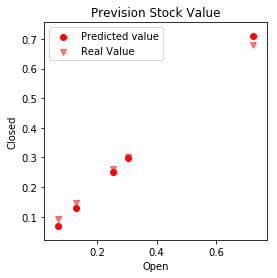

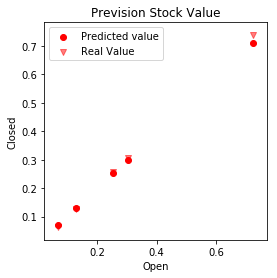

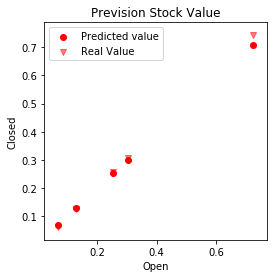

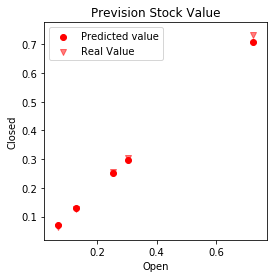

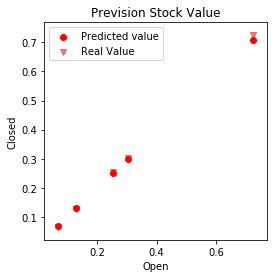

In [687]:
nb_features = len(features)
dim_out = 1
nb_epochs = 1000
test_size = 0.2
lr = 0.01

tf.reset_default_graph()

#input = tf.get_variable(shape=[None, dim_in],name='weight')
input = tf.placeholder(shape=[None,nb_features], dtype=tf.float32, name='input')
output = FCN_model('FCN', input)

ys = tf.placeholder(shape=[None,1],dtype=tf.float32, name='ys')        
loss = tf.reduce_mean(tf.square(ys - output)) 

init = tf.global_variables_initializer(), tf.local_variables_initializer()
writer = tf.summary.FileWriter('./log')
merged_summary = tf.summary.merge_all()

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

with tf.Session() as sess:
    sess.run(init)
    #KFOLD
    
    for iter in range(nb_epochs):
        
        SS = ShuffleSplit(n_splits=5, test_size = test_size, random_state=0)
        
        for train_index, test_index in SS.split(x_scaled):
            X_train, X_test = x_scaled[train_index], x_scaled[test_index]
            y_train, y_test = y_scaled[train_index], y_scaled[test_index]
        
            prediction, summary, _ = sess.run([output, merged_summary, optimizer],
                                           feed_dict = {input:X_train, ys : y_train})
        
        if (iter % 200 == 0):
            accuracy = sess.run([loss], feed_dict = {input:X_test, ys : y_test})
            #print(accuracy)
            validation(sess)
            writer.add_summary(summary)
            
        #draw validation_result
        
    
    writer.flush()
    writer.close()

In [686]:
#validation + draw predictions of the consolidated model
def validation(sess):
    x_validation = x_scaled[:nb_validation]
    y_validation = y_scaled[:nb_validation:]
    
    fig = plt.figure(figsize=(4,4))
    ax1 = fig.add_subplot(1,1,1)
    
    ax1.xaxis.set_label_text('Open')
    ax1.yaxis.set_label_text('Closed')
    ax1.set_title('Prevision Stock Value')

    index = features.index('open')
    y = y_validation.reshape(-1)
    x = x_validation[:,index]

    y_pred = sess.run([output],feed_dict = {input:x_validation})
    ax1.scatter(x, y, c='red', marker='o', label='Predicted value')
    ax1.scatter(x, y_pred, c='red', marker='v', alpha=0.5,  label='Real Value')
    plt.legend(loc='best')
    plt.show()

In [518]:
#market_data.head()
market_data[market_data['assetCode'] == 'AMZN.O']

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,...,ratio_avg_open_10_over_30,ratio_avg_close_10_over_30,ratio_avg_open_10_over_50,ratio_avg_close_10_over_50,ratio_avg_open_20_over_30,ratio_avg_close_20_over_30,ratio_avg_open_20_over_50,ratio_avg_close_20_over_50,ratio_avg_open_30_over_50,ratio_avg_close_30_over_50
84,2007-02-01 22:00:00,AMZN.O,Amazon.com Inc,1,26356712,38.7,37.95,0.027343,0.027064,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
100,2007-02-02 22:00:00,AMZN.O,Amazon.com Inc,1,26356712,39.0,38.70,0.027343,0.027064,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
101,2007-02-03 22:00:00,AMZN.O,Amazon.com Inc,1,26356712,39.3,39.00,0.027343,0.027064,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
102,2007-02-04 22:00:00,AMZN.O,Amazon.com Inc,1,26356712,39.6,39.30,0.027343,0.027064,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
103,2007-02-05 22:00:00,AMZN.O,Amazon.com Inc,1,26356712,39.9,39.60,0.027343,0.027064,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
104,2007-02-06 22:00:00,AMZN.O,Amazon.com Inc,1,26356712,40.2,39.90,0.027343,0.027064,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
105,2007-02-07 22:00:00,AMZN.O,Amazon.com Inc,1,26356712,40.5,40.20,0.027343,0.027064,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
106,2007-02-08 22:00:00,AMZN.O,Amazon.com Inc,1,26356712,40.8,40.50,0.027343,0.027064,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
107,2007-02-09 22:00:00,AMZN.O,Amazon.com Inc,1,26356712,41.1,40.80,0.027343,0.027064,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
108,2007-02-10 22:00:00,AMZN.O,Amazon.com Inc,1,26356712,41.1,40.80,0.027343,0.027064,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [496]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 99
Data columns (total 39 columns):
time                          126 non-null datetime64[ns]
assetCode                     126 non-null object
assetName                     126 non-null object
universe                      126 non-null int64
volume                        126 non-null int64
close                         126 non-null float64
open                          126 non-null float64
returnsClosePrevRaw1          126 non-null float64
returnsOpenPrevRaw1           126 non-null float64
returnsClosePrevMktres1       0 non-null float64
returnsOpenPrevMktres1        0 non-null float64
returnsClosePrevRaw10         126 non-null float64
returnsOpenPrevRaw10          126 non-null float64
returnsClosePrevMktres10      0 non-null float64
returnsOpenPrevMktres10       0 non-null float64
returnsOpenNextMktres10       126 non-null float64
day                           126 non-null int64
mvg_avg_open_10               126 non-